# Data Screening

Steve Purves
[](https://orcid.org/0000-0002-0760-5497)  
Charlotte Wickham

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import `la-palma.csv` - a clean subset of
[`catalogoComunSV_1663233588717.csv`](https://github.com/Notebooks-Now/submission-quarto-full/blob/main/data/catalogoComunSV_1663233588717.csv):

In [2]:
df = pd.read_csv('la-palma.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values(by=['DateTime'], ascending=True)
df.head()

In [3]:
df.describe()

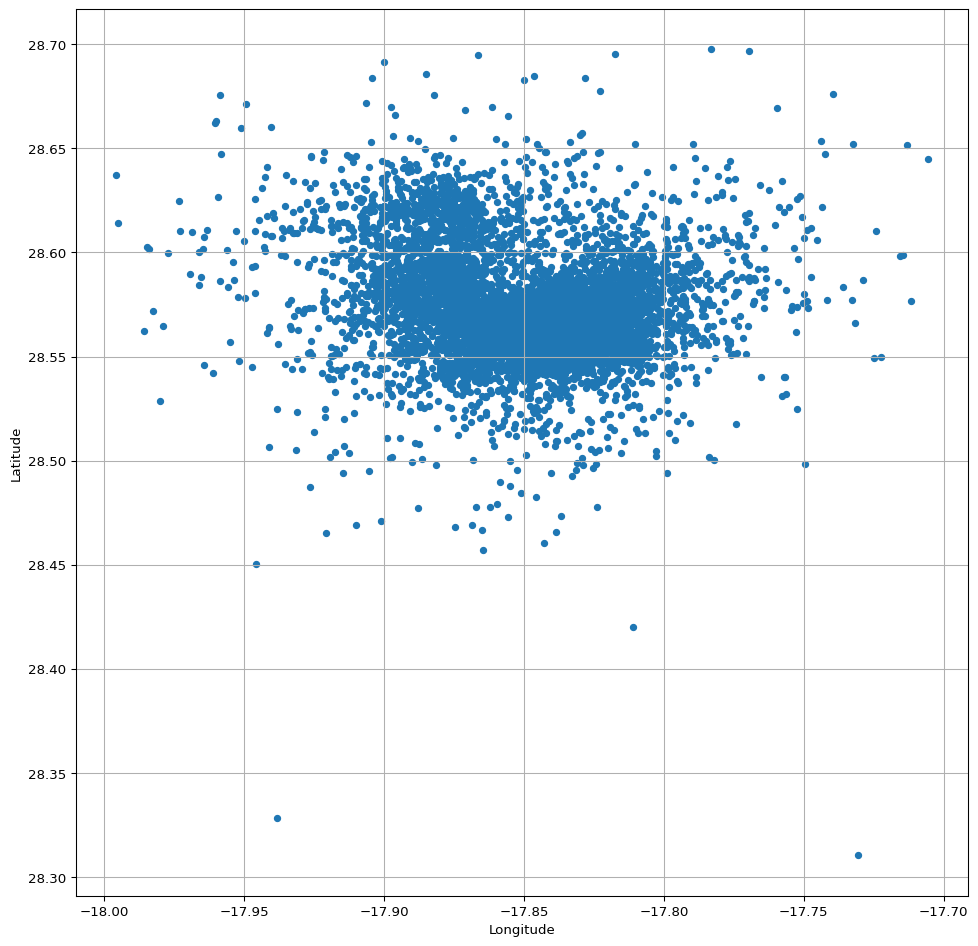

In [4]:
df.plot.scatter(x="Longitude", y="Latitude", figsize=(12,12), grid="on");

### Filter

Also some rows seem to be missing depth measurements, (see differences
in the **count** for columns above) - take only rows with valid depths

In [5]:
df = df[df['Depth(km)'].notna()]
df.describe()

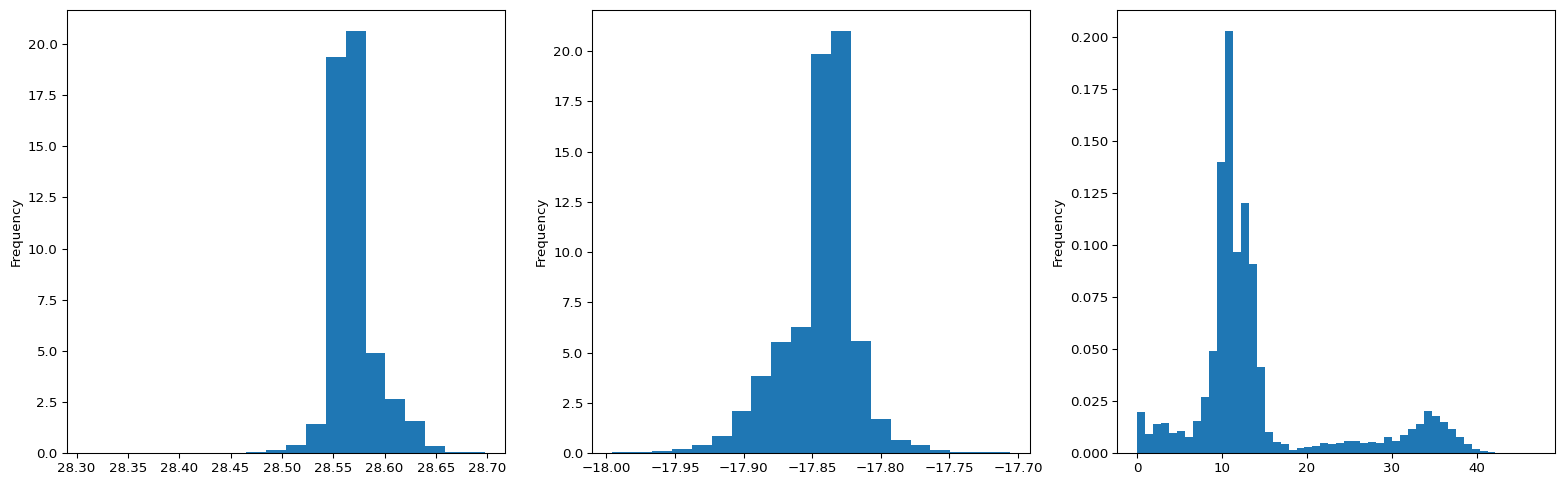

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df["Latitude"].plot.hist(bins=20, density=True)
plt.subplot(1,3,2)
df["Longitude"].plot.hist(bins=20, density=True)
plt.subplot(1,3,3)
df["Depth(km)"].plot.hist(bins=50, density=True)

## Spatial Plot

Scatter plot the spatial locations of events

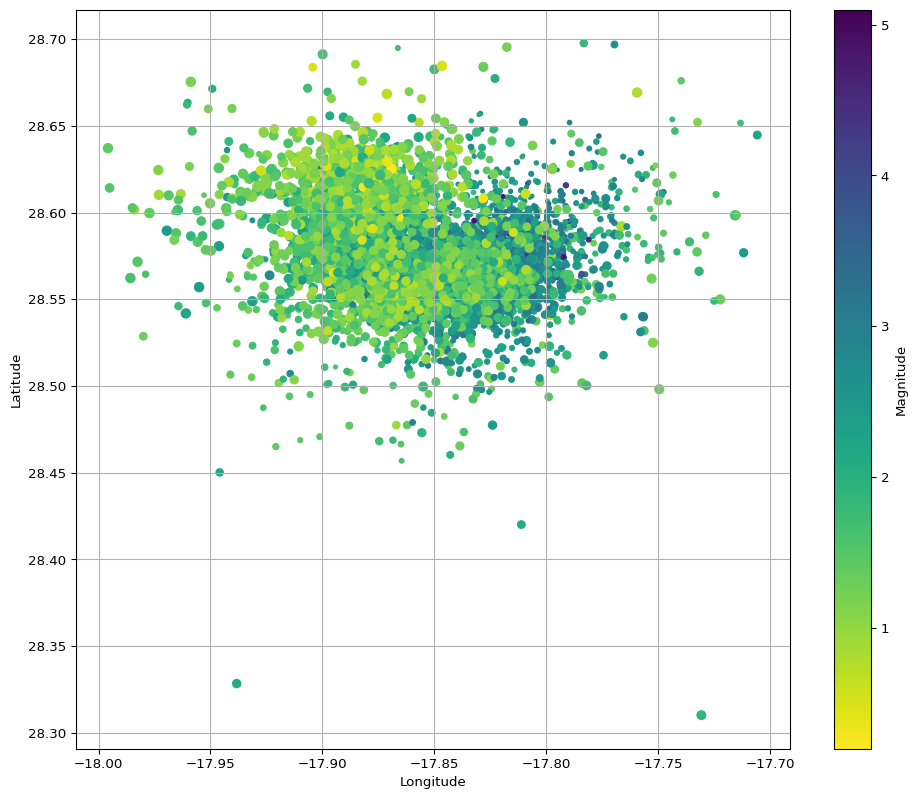

In [7]:
#| label: fig-spatial-plot
#| fig-cap: Locations of earthquakes on La Palma since 2017.
#| fig-alt: A scatterplot of earthquake locations plotting latitude against longitude.
from matplotlib import colormaps
cmap = colormaps['viridis_r']
ax = df.plot.scatter(x="Longitude", y="Latitude", 
                     s=47-df["Depth(km)"], c=df["Magnitude"], 
                     figsize=(12,10), grid="on", cmap=cmap)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Magnitude")

plt.show()

### Timeline Plot

Scatter plot the event time series and look for any quantization issues.
Have times & dates been loaded correctly?

ax = df.plot.scatter(x=‘DateTime’, y=‘Depth(km)’, figsize=(20,8))
ax.set_ylim(50,0);